In [9]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

from keras.datasets import mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

# data and parameter preparation


In [2]:
#preparation of training data
images , labels = (x_train[0:1000].reshape(1000,28*28))/225, y_train[0:1000]

one_hot_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1

labels = one_hot_labels

In [3]:
#preparation of test data
test_images = x_test.reshape(len(x_test),28*28)/225

test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1


In [4]:
#activation functions
def tanh(x):
    return np.tanh(x)

def tanh2deriv(x):
    return 1 - (x**2)

def softmax(x):
    temp = np.exp(x)
    return temp/np.sum(temp, axis=1, keepdims=True)

In [5]:
alpha, iterations= (2, 100)

pixels_per_image,  hidden_size, num_labels = (28*28, 300 ,10)
batch_size = 100

weights_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size))-0.01
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

# model training and testing


In [6]:
for j in range(iterations):
    
    correct_cnt = 0
    for i in range(int(len(images)/batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))
        
        layer_0 = images[batch_start:batch_end] #Imports multiple images in batches to process # dimensions (batch_size , pixels_per_image)
        layer_1 = tanh( np.dot( layer_0 , weights_0_1 ) )# ((batch_size , pixels_per_image)*(pixels_per_image,hidden_size) = (batch_size,hidden_size)

        # Applying Dropout for regularization
        dropput_mask = np.random.randint(2,size= layer_1.shape )
        layer_1 *= dropput_mask*2


        layer_2 = softmax( np.dot(layer_1,weights_1_2) )# (batch_size,hidden_size) * (hidden_size,num_labels) = (batch_size,num_labels)

        # training performance measurement
        for k in range(batch_size):
            correct_cnt +=  int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k : batch_start+k+1]))# compare the outcome with the highest probability
        

        #backpropagation calculations and weight updates 
        layer_2_delta = (labels[batch_start:batch_end] - layer_2)/ (batch_size*layer_2.shape[0]) # (batch_size,num_labels)

        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1) # (batch_size,num_labels)* (num_labels,hidden_size) = (batch_size,hidden_size)
        layer_1_delta *= dropput_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)# (hidden_size, batch_size)*(batch_size,num_labels) = (hidden_size, num_labels)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)# (pixels_per_image, batch_size)*(batch_size,hidden_size) = (pixels_per_image, hidden_size)
    

    # test performance measurement
    test_correct_cnt = 0
    for i in range(len(test_images)):
        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        test_correct_cnt +=  int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1])) # compare the outcome with the highest probability

    if (j % 10 == 0):
        print("\n"+ "I:" + str(j) + " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+" Train-Acc:" + str(correct_cnt/float(len(images))))




I:0 Test-Acc:0.5738 Train-Acc:0.275

I:10 Test-Acc:0.7556 Train-Acc:0.789

I:20 Test-Acc:0.7943 Train-Acc:0.834

I:30 Test-Acc:0.8131 Train-Acc:0.858

I:40 Test-Acc:0.8245 Train-Acc:0.873

I:50 Test-Acc:0.8334 Train-Acc:0.892

I:60 Test-Acc:0.8407 Train-Acc:0.889

I:70 Test-Acc:0.8462 Train-Acc:0.901

I:80 Test-Acc:0.8506 Train-Acc:0.903

I:90 Test-Acc:0.8539 Train-Acc:0.918


Prediction [1.6, -0.6, 1.9, 2.5, -4.1, 3.8, 2.0, -2.4, -0.6, -3.1]
Label [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


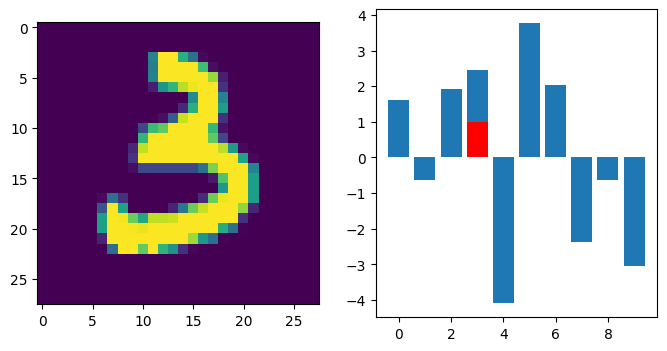

In [94]:
a = np.random.randint(len(test_images))

layer_0 = test_images[a]
layer_1 = tanh(np.dot(layer_0,weights_0_1))
layer_2 = np.dot(layer_1,weights_1_2)

rgb = 'green' if np.argmax(layer_2) == np.argmax(test_labels[a]) else 'red'


fig, axs = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)

axs[0].imshow(layer_0.reshape(28,28))

axs[1].bar(range(len(layer_2)), layer_2)
axs[1].bar(range(len(layer_2)), test_labels[a],color = rgb)


print("Prediction",[round(a,1) for a in layer_2])
print("Label",[round(a,1) for a in test_labels[a]])